# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [11165]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)
sns.set(color_codes=True)
# Create two new dataframes
northdf = pd.read_csv('NorthCallCenter.csv')
southdf = pd.read_csv('SouthCallCenter.csv')

<span style='background-color:orangered; color:orangered;'>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [11166]:
#Code Used:
# northdf.info()
# northdf['Rep ID'].unique().tolist()
northdf.nunique()


Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [11167]:
#Code Used:
southdf['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [11168]:
#Code Used:
northdf['Busy Minutes'].mean()

9.987755102040817

In [11169]:
northdf['Not Ready Minutes'].mean()

1.9142857142857144

In [11170]:
northdf['Incoming Wait Time'].mean()

3.048780487804878

In [11171]:
northdf['During Call Wait Time'].mean()

2.9673469387755103

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [11172]:
#Code Used:
avg_busy_mins_south = southdf['Busy Minutes'].mean()
avg_not_ready_mins_south = southdf['Not Ready Minutes'].mean()
avg_incoming_wait_south = southdf['Incoming Wait Time'].mean()
avg_during_call_wait_south = southdf['During Call Wait Time'].mean()
print(avg_busy_mins_south, avg_not_ready_mins_south, avg_incoming_wait_south, avg_during_call_wait_south)

10.054140127388536 1.910828025477707 3.0 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [11173]:
# Code Used:
northdf.groupby('Time Block')['Calls'].value_counts().unstack()

Calls,1
Time Block,
10:00 AM,43
11:00 AM,25
12:00 PM,45
1:00 PM,17
2:00 PM,35
3:00 PM,30
4:00 PM,28
5:00 PM,17
9:00 AM,5


In [11174]:
southdf.groupby('Time Block')['Calls'].value_counts().unstack()

Calls,1
Time Block,
10:00 AM,56
11:00 AM,31
12:00 PM,75
1:00 PM,23
2:00 PM,30
3:00 PM,43
4:00 PM,25
5:00 PM,26
9:00 AM,5


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style='background-color:orangered; color:orangered;'>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in the Incoming Wait Time field for both branches. After realizing that Outgoing calls have no Incoming Wait Time, I excluded them and found that all Incoming calls have data in the Incoming Wait Time field. Therefore, the null data is valid and should be preserved.

In [11175]:
# Code Used
# Checking for perecentage missing in North branch
for col in northdf.columns:
    pct_missing = np.mean(northdf[col].isnull())
    print(col, pct_missing)

Unnamed: 0 0.0
Branch 0.0
Call Purpose 0.0
Time Block 0.0
Incoming or Outgoing 0.0
Queue 0.0
Rep ID 0.0
Sale 0.0
Lost Call 0.0
Abandoned 0.0
Busy Minutes 0.0
Not Ready Minutes 0.0
Incoming Wait Time 0.6653061224489796
During Call Wait Time 0.0
Calls 0.0


In [11176]:
# Checking for perecentage missing in South branch
for col in southdf.columns:
    pct_missing = np.mean(southdf[col].isnull())
    print(col, pct_missing)

Unnamed: 0 0.0
Branch 0.0
Call Purpose 0.0
Time Block 0.0
Incoming or Outgoing 0.0
Queue 0.0
Rep ID 0.0
Sale 0.0
Lost Call 0.0
Abandoned 0.0
Busy Minutes 0.0
Not Ready Minutes 0.0
Incoming Wait Time 0.5987261146496815
During Call Wait Time 0.0
Calls 0.0


In [11177]:
# Need to exclude Outgoing calls, since their Incoming Wait Time is always going to be null
northdf_incoming = northdf[northdf['Incoming or Outgoing'] == 'Incoming']
northdf_incoming


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,8,3,5.0,2,1
78,78,North,Product Support,4:00 PM,Incoming,A,Cam,NO,0,0,11,2,5.0,2,1
79,79,North,Complaint,10:00 AM,Incoming,A,Joe,NO,0,0,10,2,5.0,2,1
80,80,North,Complaint,12:00 PM,Incoming,B,Lilly,NO,0,0,11,2,5.0,2,1


In [11178]:
for col in northdf_incoming.columns:
    pct_missing = np.mean(northdf_incoming[col].isnull())
    print(col, pct_missing)

Unnamed: 0 0.0
Branch 0.0
Call Purpose 0.0
Time Block 0.0
Incoming or Outgoing 0.0
Queue 0.0
Rep ID 0.0
Sale 0.0
Lost Call 0.0
Abandoned 0.0
Busy Minutes 0.0
Not Ready Minutes 0.0
Incoming Wait Time 0.0
During Call Wait Time 0.0
Calls 0.0


In [11179]:
# Since the minimum wait time in the dataset is 1, we can assume null = 0 and update the column in both dataframes
southdf_incoming = southdf[southdf['Incoming or Outgoing'] == 'Incoming']
southdf_incoming

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,South,Complaint,1:00 PM,Incoming,D,Randy,NO,0,0,10,2,5.0,4,1
122,122,South,Complaint,2:00 PM,Incoming,C,Alice,NO,0,0,11,3,5.0,3,1
123,123,South,Complaint,3:00 PM,Incoming,D,Kate,NO,0,0,10,2,5.0,3,1
124,124,South,Complaint,4:00 PM,Incoming,C,Sandy,NO,0,0,9,3,5.0,3,1


In [11180]:
for col in southdf_incoming.columns:
    pct_missing = np.mean(southdf_incoming[col].isnull())
    print(col, pct_missing)

Unnamed: 0 0.0
Branch 0.0
Call Purpose 0.0
Time Block 0.0
Incoming or Outgoing 0.0
Queue 0.0
Rep ID 0.0
Sale 0.0
Lost Call 0.0
Abandoned 0.0
Busy Minutes 0.0
Not Ready Minutes 0.0
Incoming Wait Time 0.0
During Call Wait Time 0.0
Calls 0.0


#### Cleaning Question 2:  In the North data set, there are two separate 'YES' values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: Some 'Yes' responses had a trailing space. I removed them with the Replace method, so now there are only 2 unique entries in the Sale field: Yes/No

In [11181]:
# Checking to see what unique values exist in the Sale field
northdf['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [11182]:
# Removing the trailing space that caused two "YES" responses in the Sale field
northdf['Sale'] = northdf['Sale'].replace(r'^ +| +$', r'', regex=True)

In [11183]:
# Checking to see that my replace method worked and there is only one "YES" response in the Sale field
northdf['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Yes, there are duplicates, but it seems reasonable to me that the same rep could have more than one call during the same time block with all the same parameters, so I don't think it is bad data. For this reason, I'm choosing not to drop the duplicates.

In [11184]:
# First, I'm renaming the first column in my dfs to be more readable
northdf.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
southdf.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)


In [11185]:
# Seeing no duplicates because of Index column
northdf[northdf.duplicated()]

,Index,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [11186]:
southdf[southdf.duplicated()]

,Index,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [11187]:
# Now excluding Index column to check for duplicates
northdf[northdf.drop(columns=['Index']).duplicated()]

,Index,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [11188]:
southdf[southdf.drop(columns=['Index']).duplicated()]

,Index,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The 'Index' column that I renamed is the same as the row number. This means that when I combine the dataframes, there will be duplicates from each dataframe. I will remove this column and rely on the row number for the true index.

In [11189]:
# Checking 'Index' values in each branch 
northdf['Index'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11190]:
southdf['Index'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11191]:
# Checking shape before making changes
northdf.shape

(245, 15)

In [11192]:
southdf.shape

(314, 15)

In [11193]:
# I think the 'Index' column is unnecessary, will cause problems when we merge the dataframes, and should be removed.
northdf_copy = northdf.drop('Index', axis=1)
southdf_copy = southdf.drop('Index', axis=1)

In [11194]:
# Checking shape to confirm changes
northdf_copy.shape

(245, 14)

In [11195]:
southdf_copy.shape

(314, 14)

<span style='background-color:orangered; color:orangered;'>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [11196]:
# Create dataframe for the entire company named df by combining the northdf and southdf
# Using my northdf_copy and southdf_copy dataframes to carry over my changes
df = northdf_copy.merge(southdf_copy, how='outer')
df.shape


(559, 14)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [11197]:
# Grouping by Rep ID and Branch, then returning the total number of calls per rep, sorted by most calls 
df.groupby(['Rep ID', 'Branch'])['Calls'].value_counts().nlargest()


Rep ID  Branch  Calls
Brent   North   1        37
Eric    South   1        35
Randy   South   1        33
Sandy   South   1        32
Helga   South   1        31
Name: Calls, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? South Branch and company wide numbers are below the 2% minimum threshold

In [11198]:
# Checking to see if there are Abandoned calls for both Incoming and Outgoing before moving forward
df.groupby(['Incoming or Outgoing'])['Abandoned'].sum()

Incoming or Outgoing
Incoming    4
Outgoing    7
Name: Abandoned, dtype: int64

In [11199]:
# Total Company
df['Abandoned'].sum() / df['Calls'].sum() * 100

1.9677996422182469

In [11200]:
# Grouped by Branch
df.groupby(['Branch'])['Abandoned'].sum() / df.groupby(['Branch'])['Calls'].sum() * 100

Branch
North    2.857143
South    1.273885
dtype: float64

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.2% of 82 total incoming calls
- South Branch = 38.1% of 126 total incoming calls
- Company Wide = 38.9% of 208 total incoming calls

In [11201]:
# Creating dataframe with just Incoming calls
df_incoming = df[df['Incoming or Outgoing'] == 'Incoming']
df_incoming

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,South,Complaint,1:00 PM,Incoming,D,Randy,NO,0,0,10,2,5.0,4,1
367,South,Complaint,2:00 PM,Incoming,C,Alice,NO,0,0,11,3,5.0,3,1
368,South,Complaint,3:00 PM,Incoming,D,Kate,NO,0,0,10,2,5.0,3,1
369,South,Complaint,4:00 PM,Incoming,C,Sandy,NO,0,0,9,3,5.0,3,1


In [11202]:
# Creating another dataframe with just the Incoming calls that have 2 or lower in the Incoming Wait Time field
less_than_df = df_incoming[df_incoming['Incoming Wait Time'] <= 2]
less_than_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,South,Complaint,2:00 PM,Incoming,D,Karl,NO,0,0,8,2,2.0,4,1
289,South,Complaint,3:00 PM,Incoming,C,Susan,NO,0,0,9,1,2.0,4,1
290,South,Complaint,3:00 PM,Incoming,D,Helga,NO,0,0,12,1,2.0,2,1
291,South,Complaint,3:00 PM,Incoming,C,Sandy,NO,0,0,10,3,2.0,4,1


In [11203]:
# Getting total number of incoming calls for the company
df_incoming['Calls'].sum()

208

In [11204]:
# And for each branch
df_incoming.groupby(['Branch'])['Calls'].sum()

Branch
North     82
South    126
Name: Calls, dtype: int64

In [11205]:
# Comparing the number of incoming calls that were answered in less than 2 secs to the total number of incoming calls for the company
less_than_df['Calls'].sum() / df_incoming['Calls'].sum() * 100

38.94230769230769

In [11206]:
# Looking at the same data, grouped by branch
less_than_df.groupby(['Branch'])['Calls'].sum() / df_incoming.groupby(['Branch'])['Calls'].sum() * 100

Branch
North    40.243902
South    38.095238
Name: Calls, dtype: float64

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02


In [11207]:
# Average Speed of Answer by branch 
df.groupby(['Branch'])['Incoming Wait Time'].mean()

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64

In [11208]:
# Average Speed of Answer for the company
df['Incoming Wait Time'].mean()

3.019230769230769

<span style='background-color:orangered; color:orangered;'>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart so you can see that the A queue has a significantly higher percentage of Abandoned Calls than the other queues.

In [11209]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ['A', 'B', 'C', 'D']
queue_dict = df.groupby('Queue').agg('sum','numeric_only')
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict['Abandoned'][i] / queue_dict['Calls'][i] 

print(abandonment_rates)

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


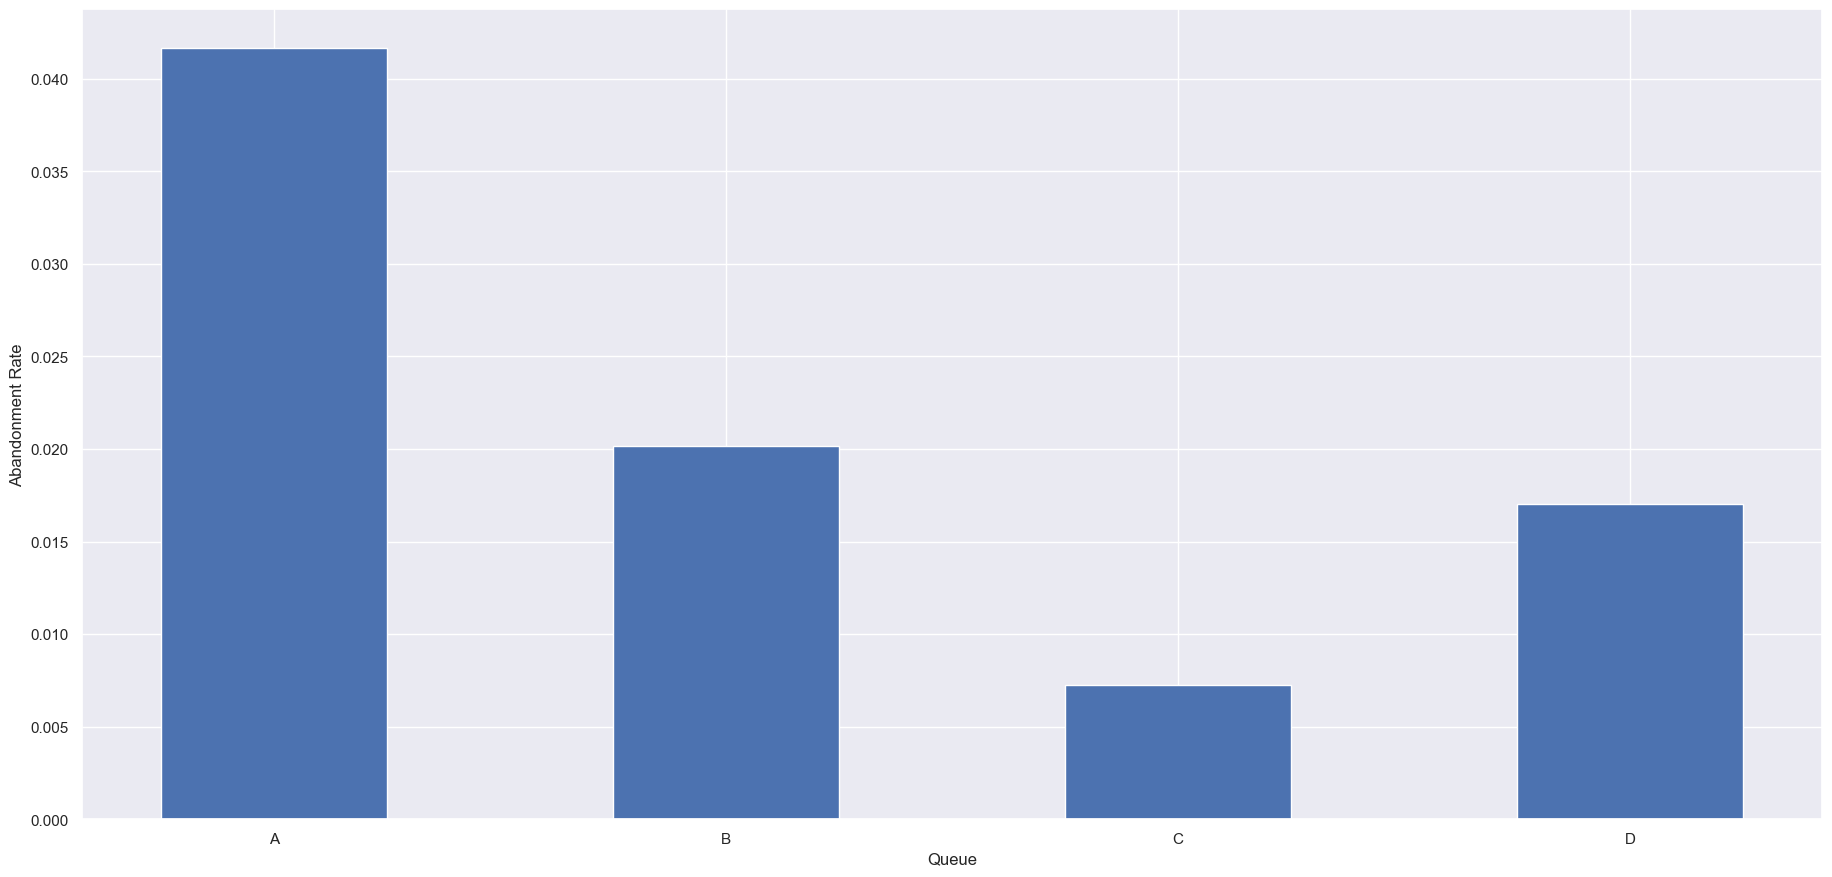

In [11210]:
plt.bar(abandonment_rates.keys(), abandonment_rates.values(), width=0.5)
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.show()

In [11211]:
# Alternate Method: Converting dictionary to dataframe
abandoned_df = pd.DataFrame(list(abandonment_rates.items()))
abandoned_df

,0,1
0,A,0.041667
1,B,0.020134
2,C,0.007246
3,D,0.017045


In [11212]:
# Renaming columns
abandoned_df.rename(columns={ 0 : 'Queue', 1 : 'Abandonment Rate'}, inplace=True)
abandoned_df

,Queue,Abandonment Rate
0,A,0.041667
1,B,0.020134
2,C,0.007246
3,D,0.017045


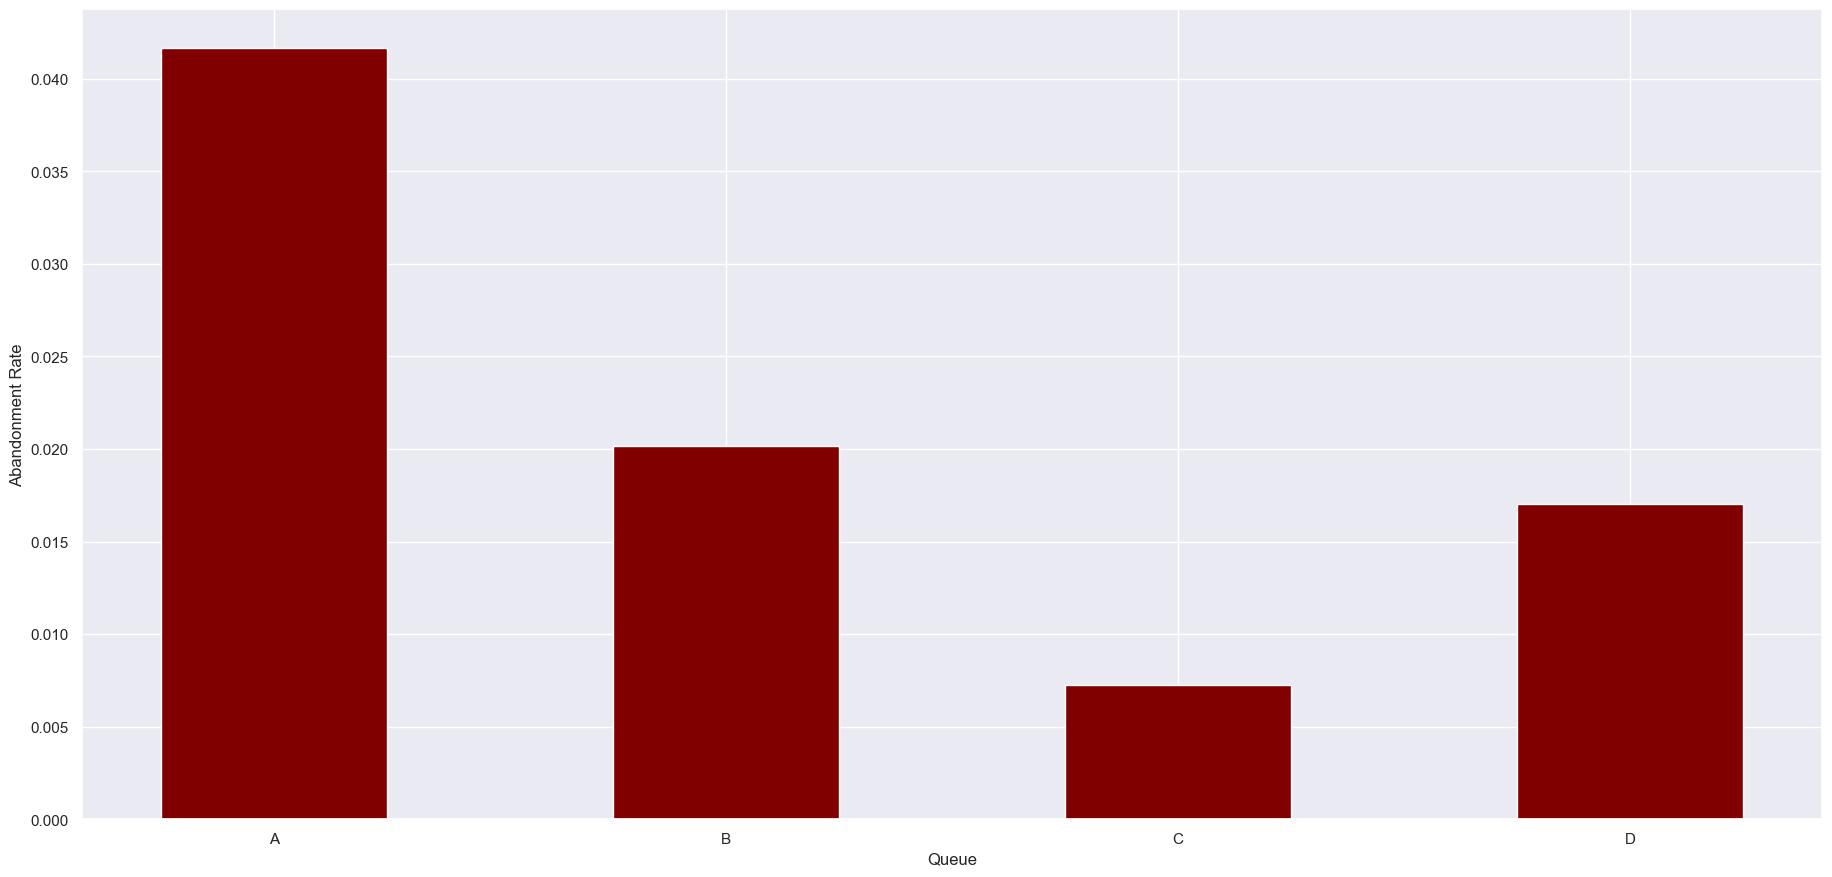

In [11213]:
# Plotting Abandoned dataframe in a bar chart to show differences between queues
plt.bar(abandoned_df['Queue'], abandoned_df['Abandonment Rate'], color = 'maroon', width=0.5)
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a horizontal bar chart with both columns of data (Incoming Wait Time and Service Level %) so you could see how they vary by Rep.

In [11214]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = northdf.groupby('Rep ID')['Incoming Wait Time'].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = northdf[northdf['Incoming Wait Time'] <= 2.0]
quick_reps = quick_calls[['Rep ID', 'Calls']]
quick_stats = quick_reps.groupby(['Rep ID']).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = northdf[northdf['Incoming or Outgoing'] == 'Incoming']
rep_calls = total_calls_in[['Rep ID', 'Calls']]     
total_stats = rep_calls.groupby(['Rep ID']).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on='Rep ID').reset_index()

# Create Percentage Column in Table 3
service_level['Service Level %'] = service_level['Calls_x']/service_level['Calls_y'] * 100

In [11215]:
# Looking at structure of dataframe
north_plt

,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714
5,Joe,3.600000
6,Lilly,3.083333
7,Todd,3.500000
8,Xander,3.333333


In [11216]:
# Looking at structure of dataframe
service_level

,Rep ID,Calls_x,Calls_y,Service Level %
0,Amanda,3,5,60.000000
1,Andy,3,10,30.000000
2,Brent,6,8,75.000000
3,Cam,5,11,45.454545
4,Duke,6,14,42.857143
5,Joe,2,10,20.000000
6,Lilly,4,12,33.333333
7,Todd,2,6,33.333333
8,Xander,2,6,33.333333


In [11217]:
# Merging dataframes to show in one graph
repstats_df = pd.merge(north_plt, service_level, on='Rep ID')
# Dropping irrelevant columns
repstats_df_copy = repstats_df.drop(['Calls_x', 'Calls_y'], axis=1)
repstats_df_copy

,Rep ID,Incoming Wait Time,Service Level %
0,Amanda,2.400000,60.000000
1,Andy,3.600000,30.000000
2,Brent,2.125000,75.000000
3,Cam,2.909091,45.454545
4,Duke,2.785714,42.857143
5,Joe,3.600000,20.000000
6,Lilly,3.083333,33.333333
7,Todd,3.500000,33.333333
8,Xander,3.333333,33.333333


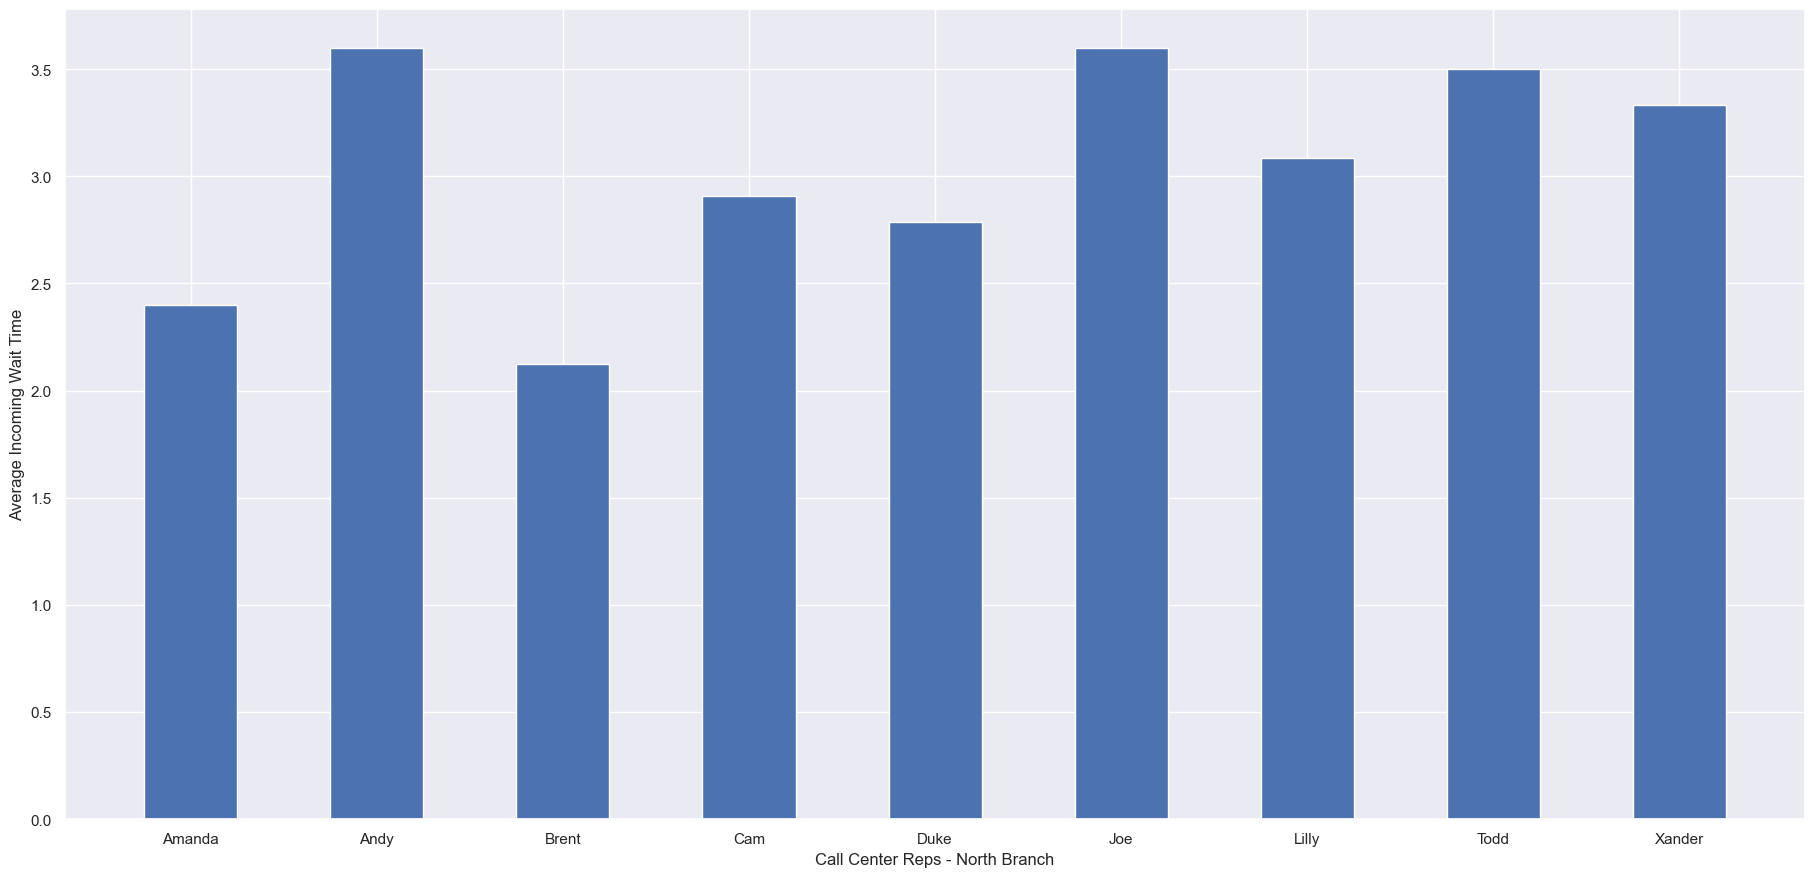

In [11218]:
# Quick bar graph showing average Incoming Wait Time by Rep
plt.bar(repstats_df_copy['Rep ID'], repstats_df_copy['Incoming Wait Time'], width=0.5)
plt.xlabel('Call Center Reps - North Branch')
plt.ylabel('Average Incoming Wait Time')
plt.show()

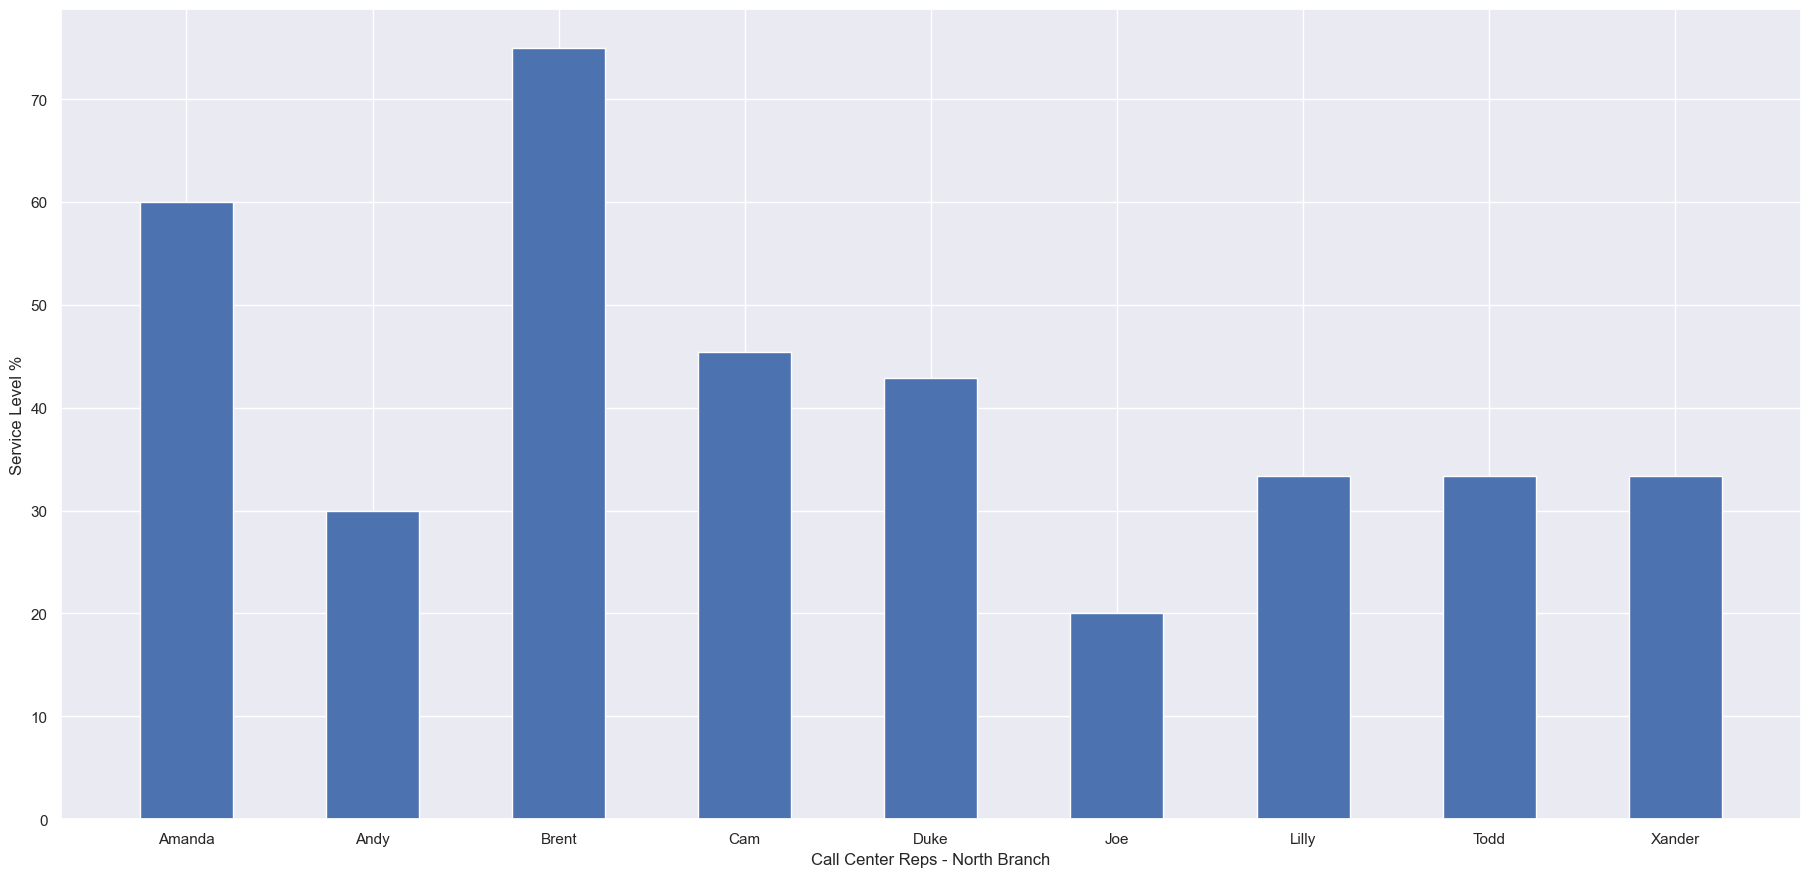

In [11219]:
# Quick bar graph showing average Service Level % by Rep
plt.bar(repstats_df_copy['Rep ID'], repstats_df_copy['Service Level %'], width=0.5)
plt.xlabel('Call Center Reps - North Branch')
plt.ylabel('Service Level %')
plt.show()

<AxesSubplot: ylabel='Rep ID'>

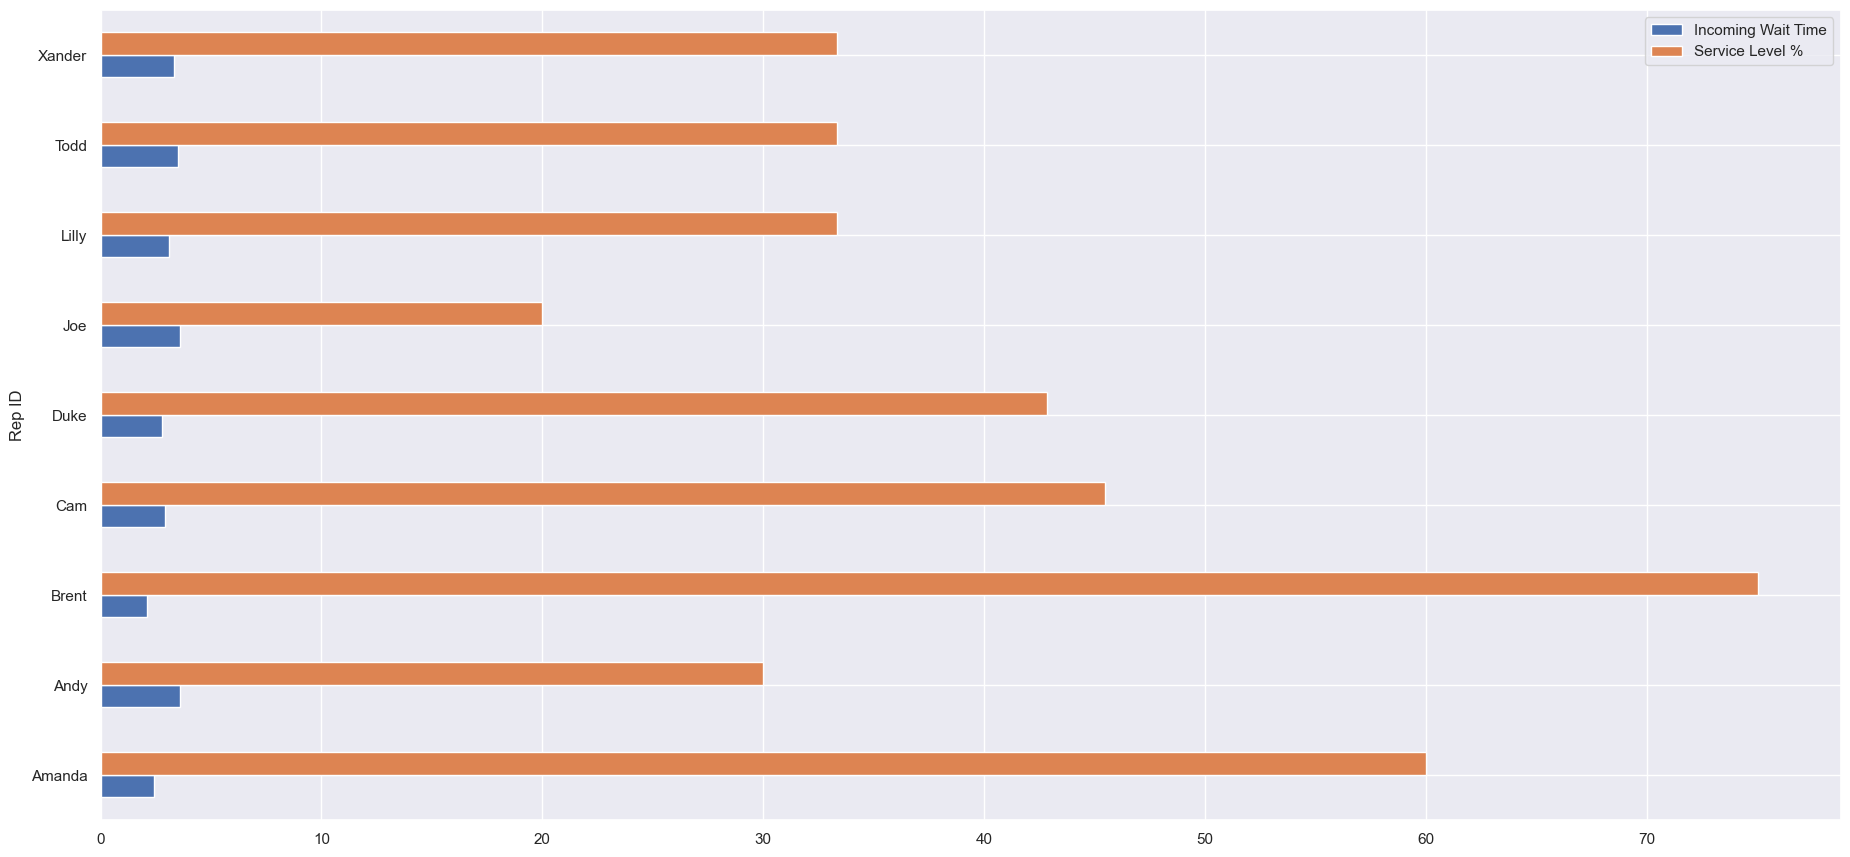

In [11220]:
# Horizontal bar chart to show both stats
repstats_df_copy.plot(x='Rep ID',y=['Incoming Wait Time', 'Service Level %'], kind='barh')

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose to use a pie chart so it's visually clear whether most of the calls for each purpose are incoming versus outgoing.

In [11221]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby('Call Purpose')
call_purpose = ['Complaint', 'Product Support', 'Sales Support']
purpose_counts = purpose_group['Incoming or Outgoing'].value_counts()
#print(purpose_counts)

complaints = purpose_counts['Complaint'].to_dict()
sales_support = purpose_counts['Sales Support'].to_dict()
product_support = purpose_counts['Product Support'].to_dict()

# Looking at dictionary structure
print(complaints)
print(sales_support)
print(product_support)

{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}


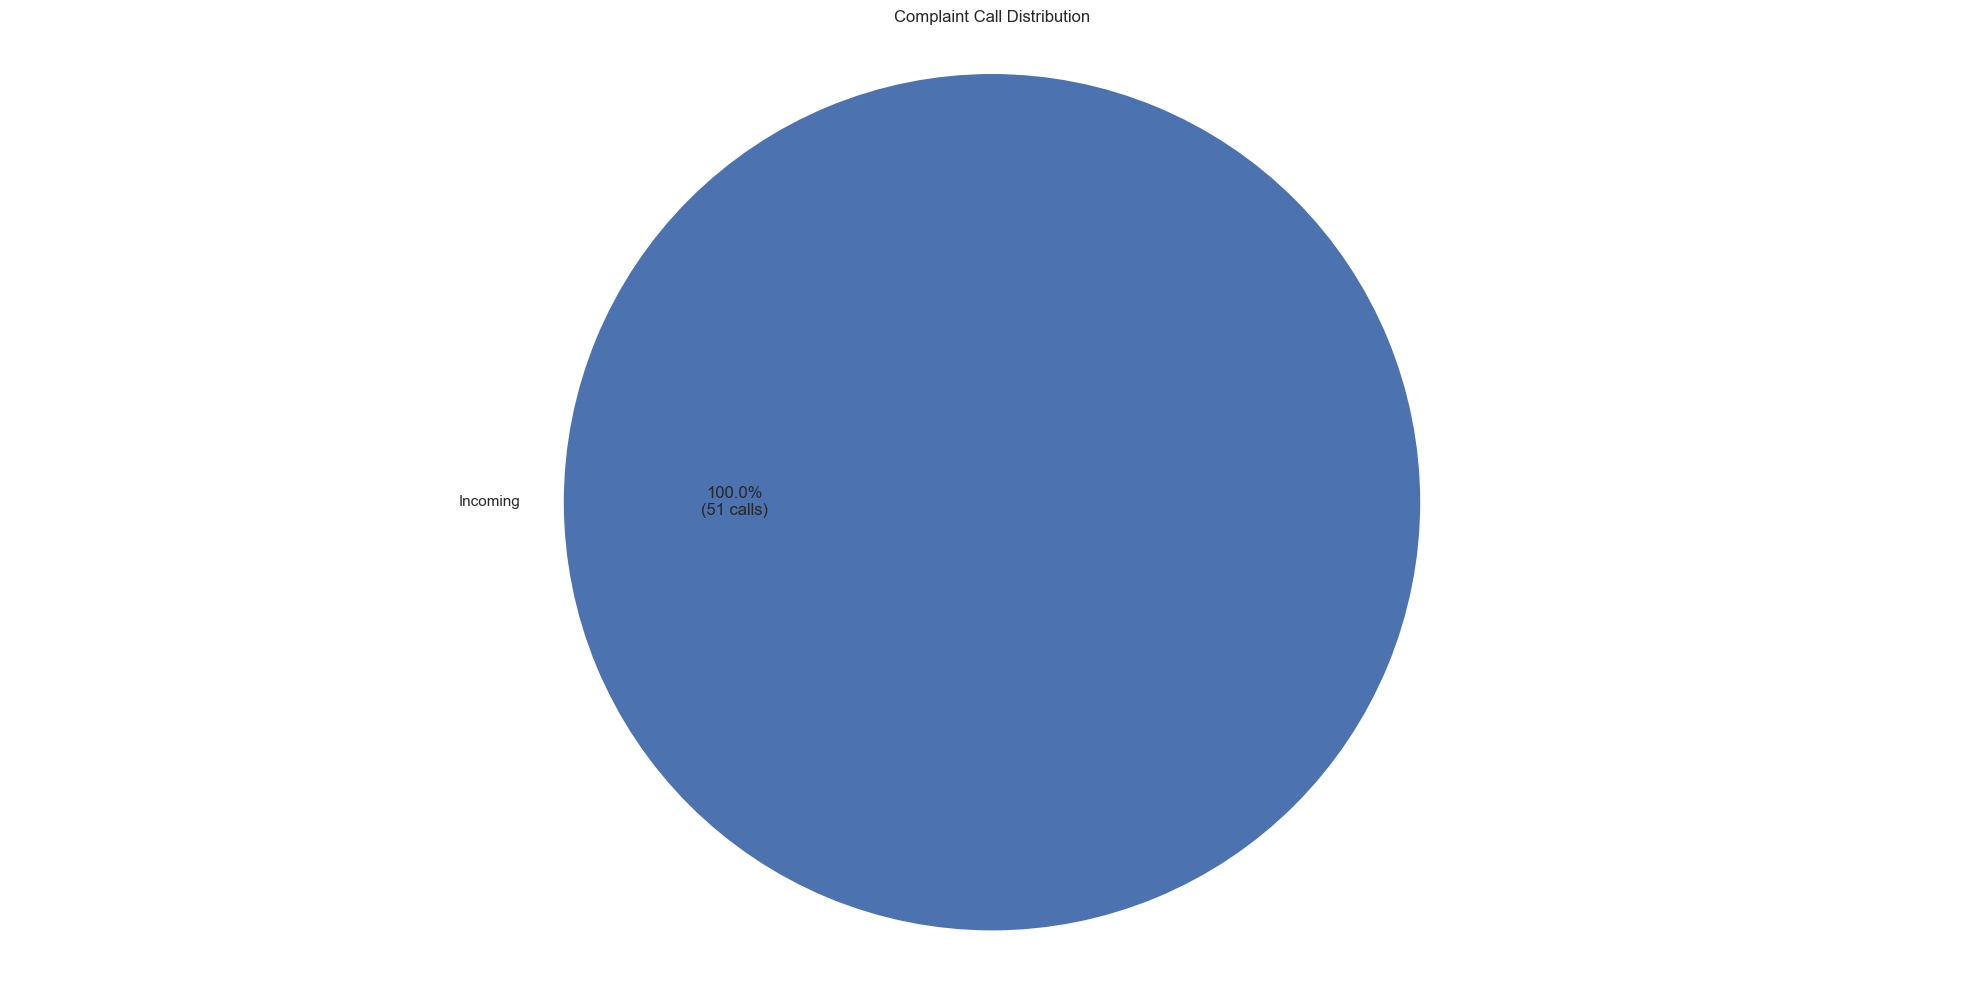

In [11222]:
# Creating pie chart for Complaints
pie_labels = complaints.keys()
pie_sizes = complaints.values()
data = [float(value) for value in pie_sizes]
fig, ax = plt.subplots()

# Function to add actual call totals to each pie wedge, in addition to the percentage for each type
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} calls)"

ax.pie(pie_sizes, labels=pie_labels, autopct=lambda pct: func(pct, data))
ax.axis('equal')
plt.title('Complaint Call Distribution')
plt.tight_layout()
plt.show()

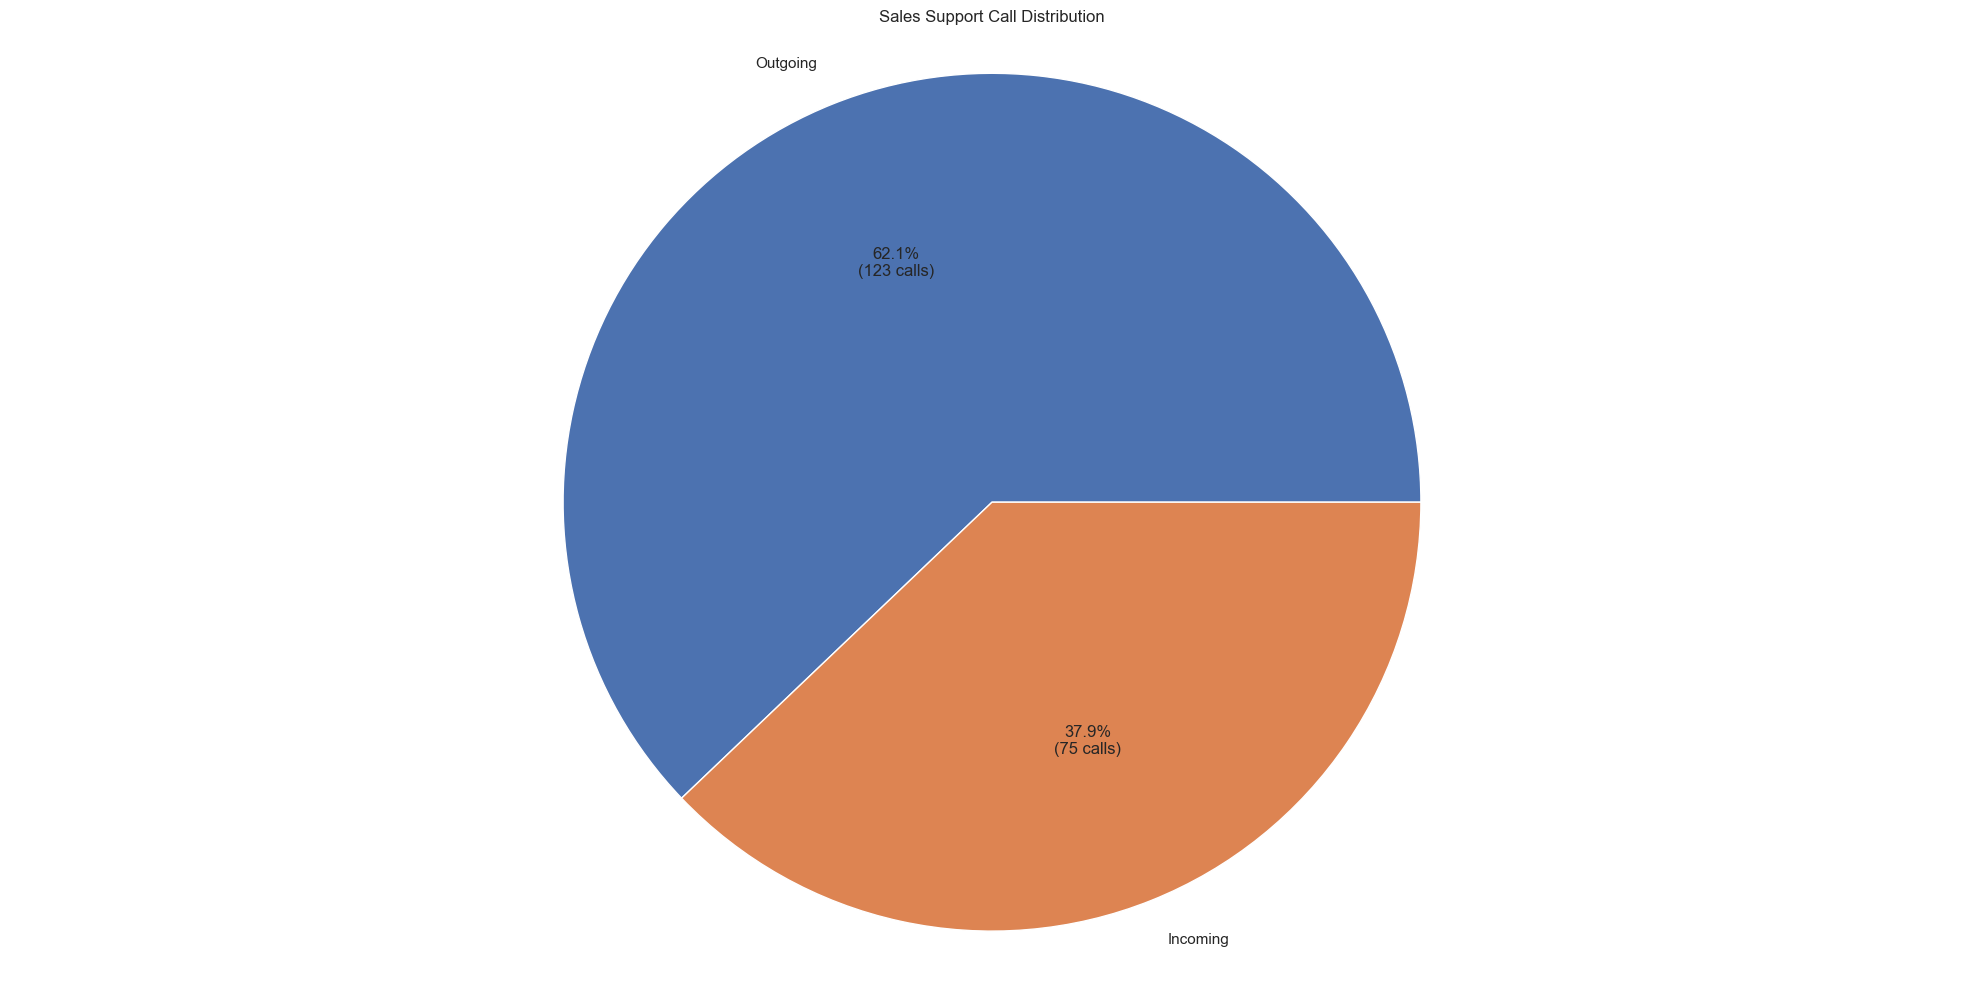

In [11223]:
# Creating pie chart for Sales Support
pie_labels = sales_support.keys()
pie_sizes = sales_support.values()
data = [float(value) for value in pie_sizes]
fig, ax = plt.subplots()

ax.pie(pie_sizes, labels=pie_labels, autopct=lambda pct: func(pct, data))
ax.axis('equal')
plt.title('Sales Support Call Distribution')
plt.tight_layout()
plt.show()

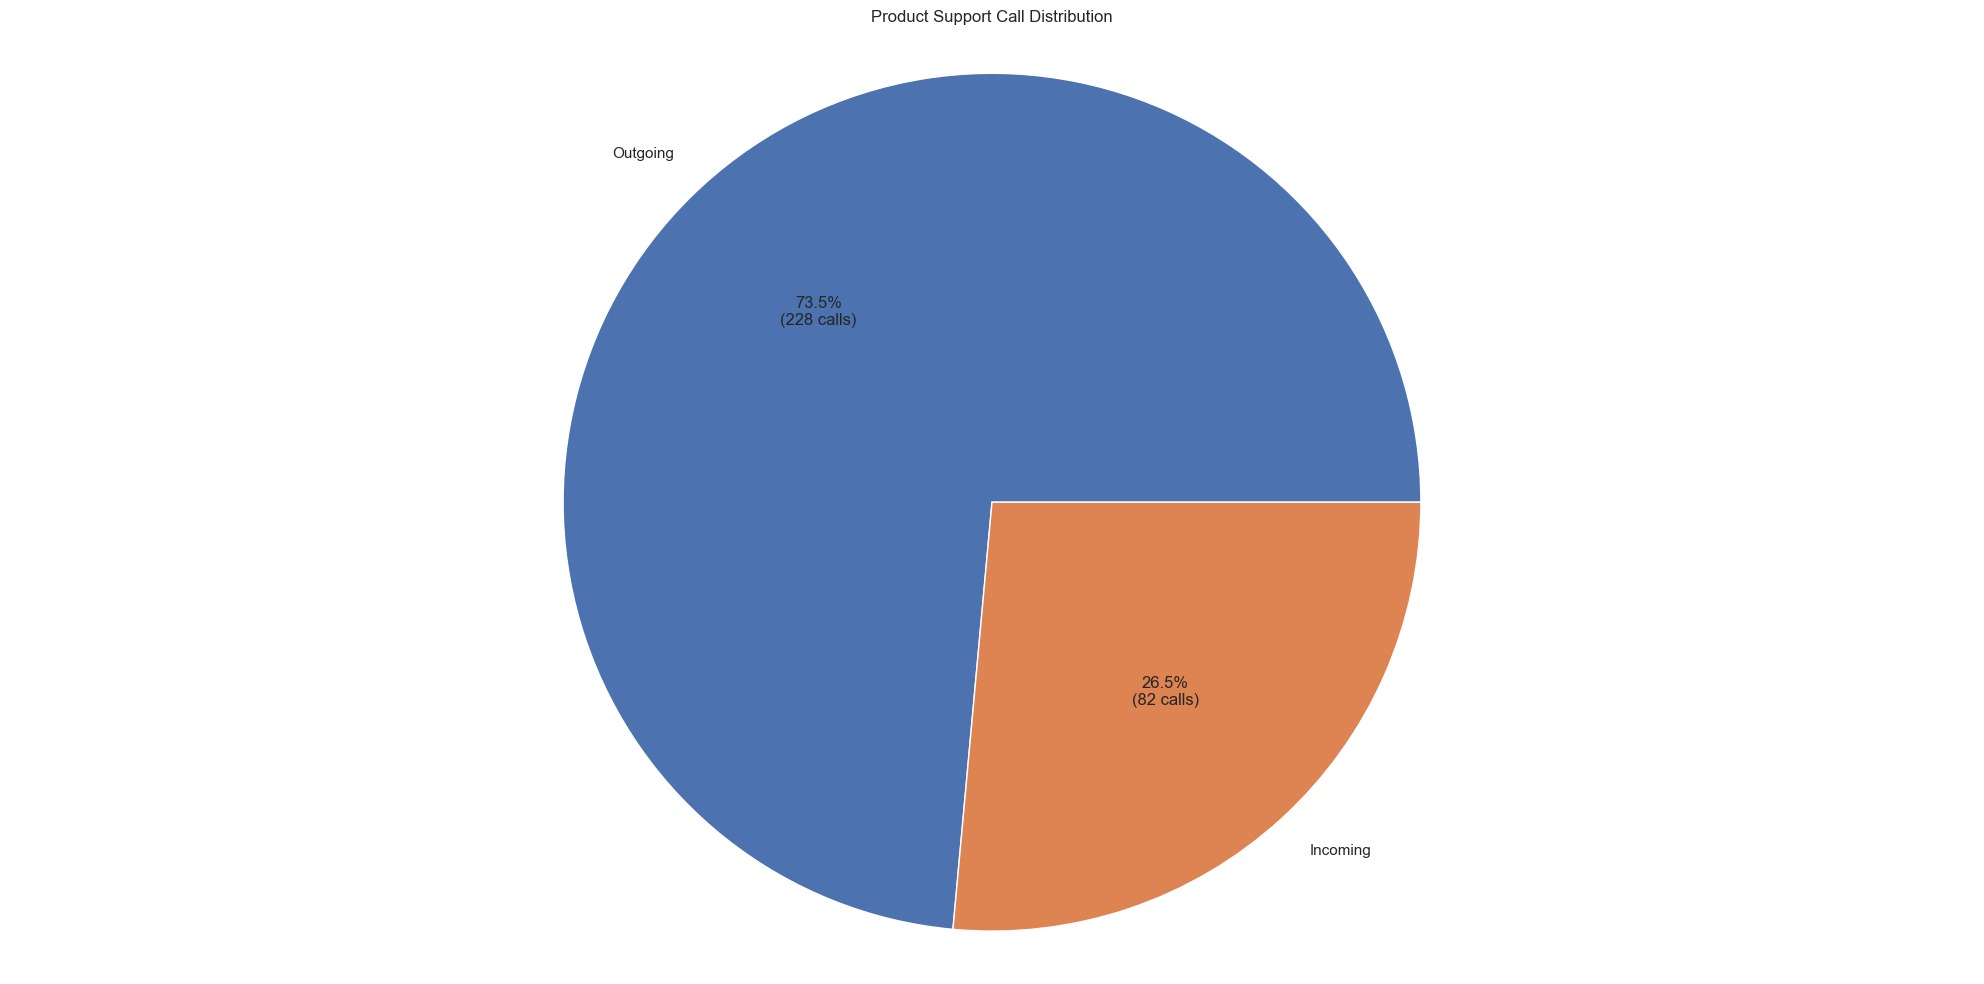

In [11224]:
# Creating pie chart for Product Support
pie_labels = product_support.keys()
pie_sizes = product_support.values()
data = [float(value) for value in pie_sizes]
fig, ax = plt.subplots()

ax.pie(pie_sizes, labels=pie_labels, autopct=lambda pct: func(pct, data))
ax.axis('equal')
plt.title('Product Support Call Distribution')
plt.tight_layout()
plt.show()

<span style='background-color:orangered; color:orangered;'>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South branch looks to be more efficient. They have higher call volume, quicker call pickups, and fewer abandoned calls.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The South branch would benefit from the extra help because they have a higher call volume and a higher During Call Wait Time than the North branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Although it can be useful to compare numbers like wait time, it doesn't factor in whether the customer was satisfied in the end. I would like to see a customer rating for each call, to see if the extra wait time affects the customer's perceived satisfaction level.


<span style='background-color:orangered; color:orangered;'>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [11225]:
# Create your Bonus Mission visualization here!
call_times = df[['Time Block', 'Call Purpose', 'Incoming or Outgoing', 'Calls']]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: